Loaded 5000 images of shape (128, 128, 3)


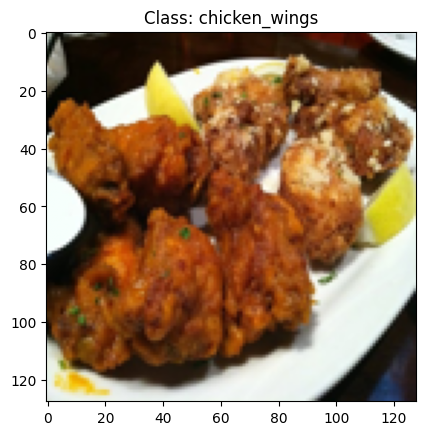

In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


IMAGE_SIZE = (128, 128)
DATA_PATH = 'images'

def load_images(data_path, img_size=IMAGE_SIZE):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_path)) 
    class_map = {class_name: idx for idx, class_name in enumerate(class_names)}
    
    for class_name in class_names:
        class_path = os.path.join(data_path, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path).resize(img_size)
            img = np.array(img) / 255.0  
            images.append(img)
            labels.append(class_map[class_name])
    
    return np.array(images), np.array(labels), class_map

# Load data
X, y, class_map = load_images(DATA_PATH)
print(f"Loaded {X.shape[0]} images of shape {X.shape[1:]}")


plt.imshow(X[0])
plt.title(f"Class: {list(class_map.keys())[y[0]]}")
plt.show()


C:\Users\Account\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 379ms/step - accuracy: 0.2346 - loss: 2.2204 - val_accuracy: 0.3650 - val_loss: 1.4606
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 371ms/step - accuracy: 0.3641 - loss: 1.4660 - val_accuracy: 0.3820 - val_loss: 1.4879
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 361ms/step - accuracy: 0.4181 - loss: 1.4058 - val_accuracy: 0.3930 - val_loss: 1.4710
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 360ms/step - accuracy: 0.4918 - loss: 1.2448 - val_accuracy: 0.4480 - val_loss: 1.3546
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 359ms/step - accuracy: 0.5995 - loss: 1.0365 - val_accuracy: 0.4160 - val_loss: 1.4309
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 360ms/step - accuracy: 0.6935 - loss: 0.8191 - val_accuracy: 0.4230 - val_loss: 1.5551
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 357ms/step - accuracy: 0.7836 - loss: 0.6309 - val_accuracy: 0.4580 - val_loss: 1.6081
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 366ms/step - accuracy: 0.8276 - loss: 0

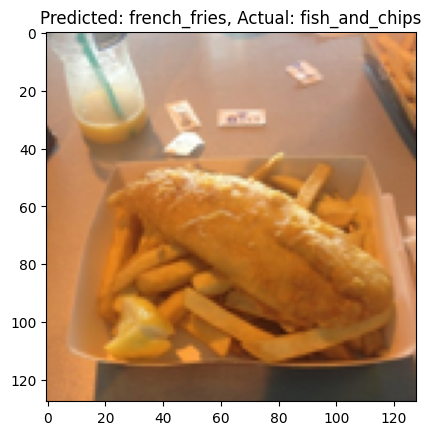

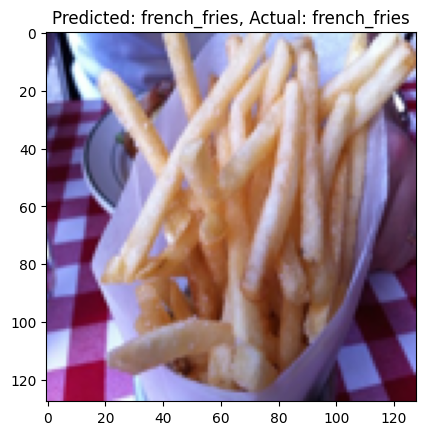

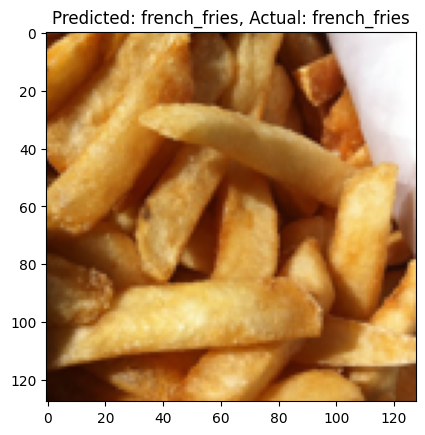

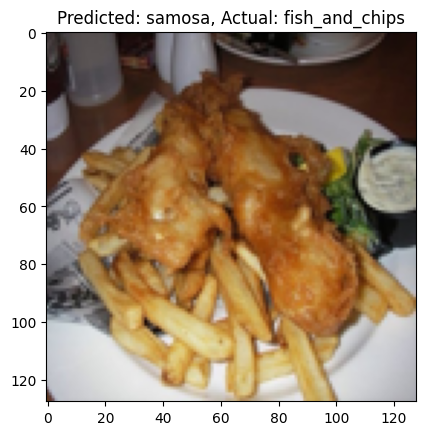

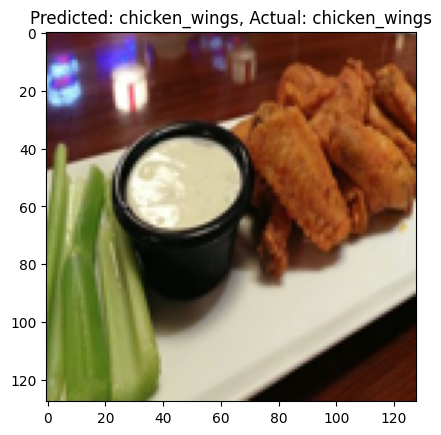

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn(input_shape):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Prevent overfitting
    model.add(Dense(len(class_map), activation='softmax'))  # Output layer (one node per class)
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
cnn_model = build_cnn(input_shape)


cnn_model.summary()

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cnn_model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))


test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


predictions = cnn_model.predict(X_test)


for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {list(class_map.keys())[np.argmax(predictions[i])]}, Actual: {list(class_map.keys())[y_test[i]]}")
    plt.show()


